# Scales and Transformations

Certain data distributions will find themselves amenable to scale transformations. The most common example of this is data that follows an approximately [log-normal distribution](https://en.wikipedia.org/wiki/Log-normal_distribution). This is data that, in their natural units, can look highly skewed: lots of points with low values, with a very long tail of data points with large values. However, after applying a logarithmic transform to the data, the data will follow a normal distribution. (If you need a refresher on the logarithm function, check out this [lesson](https://www.khanacademy.org/math/algebra2/exponential-and-logarithmic-functions) on Khan Academy.)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df=pd.read_csv('../Code/pokemon.csv')
df.rename(columns={'#':'id'},inplace=True)
df.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


Text(0.5,0,'Log Value')

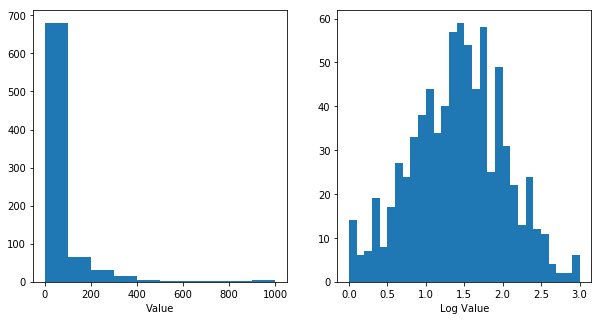

In [43]:
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
bin_edges=np.arange(0,df.weight.max()+100,100);
plt.hist(data=df,x=df.weight , bins=bin_edges);
plt.xlabel('Value')

plt.subplot(1,2,2)
log_data=np.log10(df.weight)
bin_edges=np.arange(0,log_data.max()+.1,.1);
plt.hist(log_data , bins=bin_edges);
plt.xlabel('Log Value')


In the plot on the left, the few data points with value above 700 mash the majority of the points into the bins on the far left. With the plot on the right, the logarithmic transform makes those large points look in line with the rest: a raw value of 700 becomes a value of 3 under log transform, and a raw value of 100 becomes a log-transformed value of 2. The big problem with the right-side plot is that the units on the x-axis are difficult to interpret: for most people, it is only easy to convert from log values to natural values on the integers (and this assumes a nice base like 10 as used in the example).

This is where scale transformations are handy. In a scale transformation, the gaps between values are based on the transformed scale, but you can interpret data in the variable's natural units. It is also a convenient approach since you won't need to engineer new features. Matplotlib's xscale function includes a few built-in transformations: we'll use the **'log'** scale here.

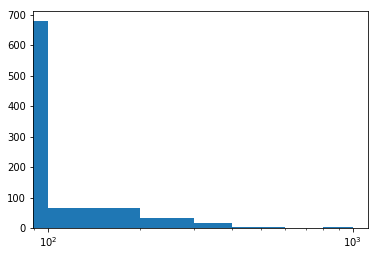

In [39]:
bin_edges = np.arange(0, df.weight.max()+100, 100)
plt.hist(df.weight, bins = bin_edges)
plt.xscale('log')

Notice two things about the plot now. Even though the data is on a log scale, the bins are still linearly spaced. This means that they change size from wide on the left to thin on the right, as the values increase multiplicatively. Secondly, the default label settings are still somewhat tricky to interpret, and are sparse as well.

To address the bin size issue, we just need to change them so that they are evenly-spaced powers of 10. Depending on what you are plotting, a different base power like 2 might be useful instead. For the ticks, we can use **xticks** to specify locations and labels in their natural units. Remember: we aren't changing the values taken by the data, only how they're displayed. Between integer powers of 10, we don't have clean values for even markings, but we can still get close. Setting ticks in cycles of 1-3-10 or 1-2-5-10 are very useful for base-10 log transforms.

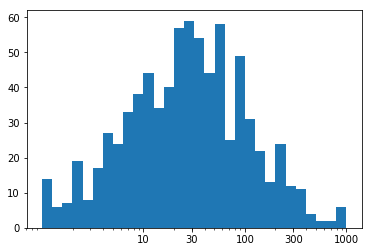

In [46]:
bin_edges = 10 ** np.arange(0, np.log10(df.weight.max())+0.1, 0.1)
plt.hist(df.weight, bins = bin_edges);
plt.xscale('log')
tick_locs = [10, 30, 100, 300, 1000]
plt.xticks(tick_locs, tick_locs);

We've ended up with the same plot as when we performed the direct log transform, but now with a much nicer set of tick marks and labels.

## Alternative Approach

Be aware that a logarithmic transformation is not the only one possible. When we perform a logarithmic transformation, our data values **have to all be positive**; it's impossible to take a log of zero or a negative number. In addition, the transformation implies that additive steps on the log scale will result in multiplicative changes in the natural scale, an important implication when it comes to data modeling. The type of transformation that you choose may be informed by the context for the data. For example, this [Wikipedia section](https://en.wikipedia.org/wiki/Log-normal_distribution#Occurrence_and_applications) provides a few examples of places where log-normal distributions have been observed.

If you want to use a different transformation that's not available in xscale, then you'll have to perform some feature engineering. In cases like this, we want to be systematic by writing a function that applies both the transformation and its inverse. The inverse will be useful in cases where we specify values in their transformed units and need to get the natural units back. For the purposes of demonstration, let's say that we want to try plotting the above data on a square-root transformation. (Perhaps the numbers represent areas, and we think it makes sense to model the data on a rough estimation of radius, length, or some other 1-d dimension.) We can create a visualization on this transformed scale like this:

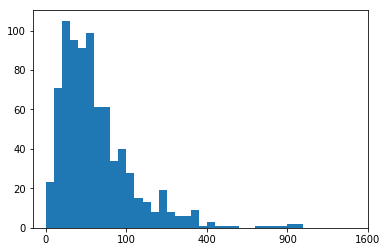

In [85]:
def sqrt_trans(x, inverse = False):
    """ transformation helper function """
    if not inverse:
        return np.sqrt(x)
    else:
        return x ** 2

bin_edges = np.arange(0, sqrt_trans(df.weight.max())+1, 1)
plt.hist(df.weight.apply(sqrt_trans), bins = bin_edges);
tick_locs = np.arange(0, sqrt_trans(df.weight.max())+10, 10);
plt.xticks(tick_locs, sqrt_trans(tick_locs, inverse = True).astype(int));


Note that data is a pandas Series, so we can use the apply method for the function. If it were a NumPy Array, we would need to apply the function like in the other cases. The tick locations could have also been specified with the natural values, where we apply the standard transformation function on the first argument of xticks instead.